<a href="https://colab.research.google.com/github/ChintPatel/CMPE255-advanced-dimensionality-reduction/blob/main/Image_Dim_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# Required Libraries
!pip install umap-learn  # Install the umap-learn package

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import umap
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.random_projection import GaussianRandomProjection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [4]:
# Paths
image_folder = "/content/Image"

# Function to preprocess images
from PIL import Image

def preprocess_images(image_folder, target_size=(64, 64)):
    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".png")]
    data = []
    for file in image_files:
        img = Image.open(file).convert('L').resize(target_size)  # Convert to grayscale and resize
        data.append(np.array(img).flatten())  # Flatten the image
    return np.array(data)

# Preprocess the images
X = preprocess_images(image_folder)
print(f"Dataset Shape: {X.shape}")

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset Shape: (809, 4096)


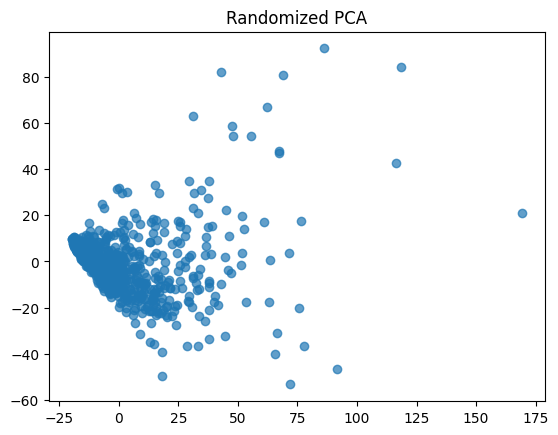

In [5]:
# 1. Randomized PCA
pca_random = PCA(n_components=2, svd_solver='randomized')
X_pca_random = pca_random.fit_transform(X_scaled)

# Plot Randomized PCA
plt.figure()
plt.scatter(X_pca_random[:, 0], X_pca_random[:, 1], alpha=0.7)
plt.title("Randomized PCA")
plt.show()

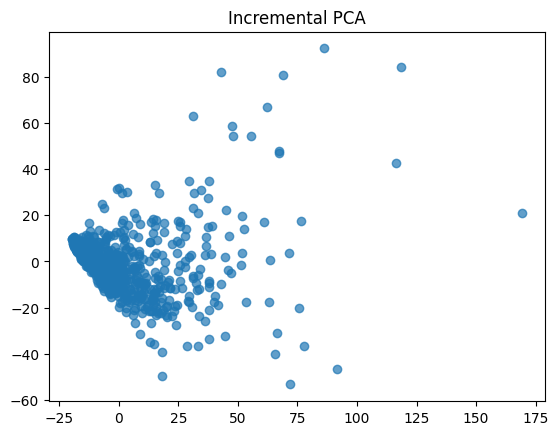

In [6]:
# 2. Incremental PCA
ipca = IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X_scaled)

# Plot Incremental PCA
plt.figure()
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], alpha=0.7)
plt.title("Incremental PCA")
plt.show()

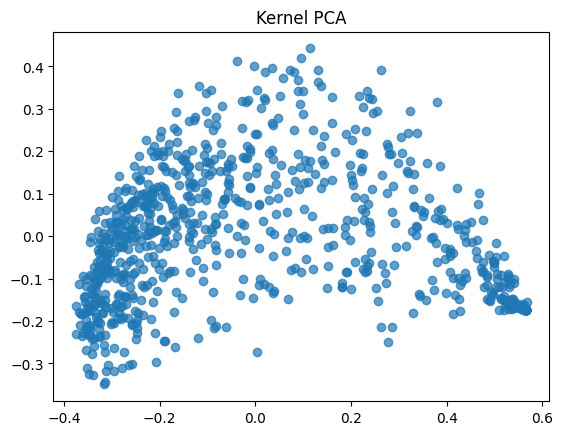

In [7]:
# 3. Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf")
X_kpca = kpca.fit_transform(X_scaled)

# Plot Kernel PCA
plt.figure()
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.7)
plt.title("Kernel PCA")
plt.show()

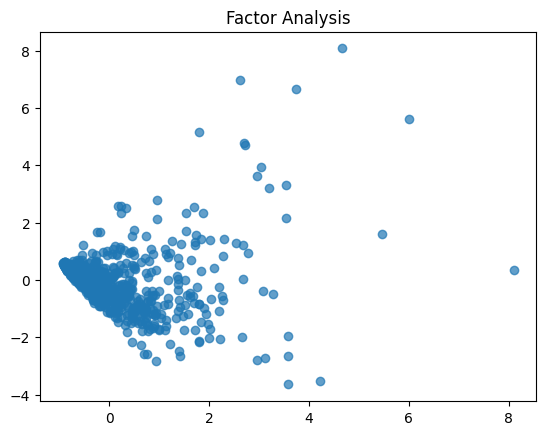

In [8]:
# 4. Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

# Plot Factor Analysis
plt.figure()
plt.scatter(X_fa[:, 0], X_fa[:, 1], alpha=0.7)
plt.title("Factor Analysis")
plt.show()

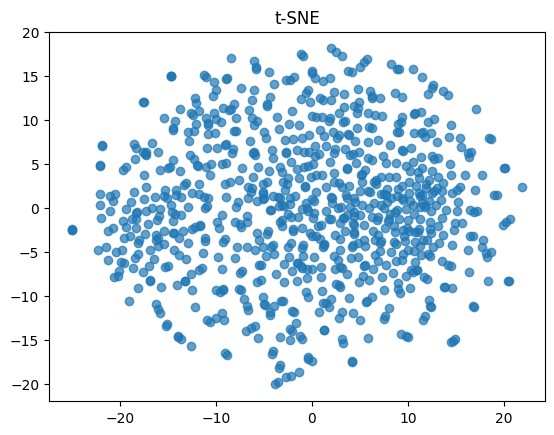

In [10]:
# 5. t-SNE (Interactive Visualization)
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.title("t-SNE")
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


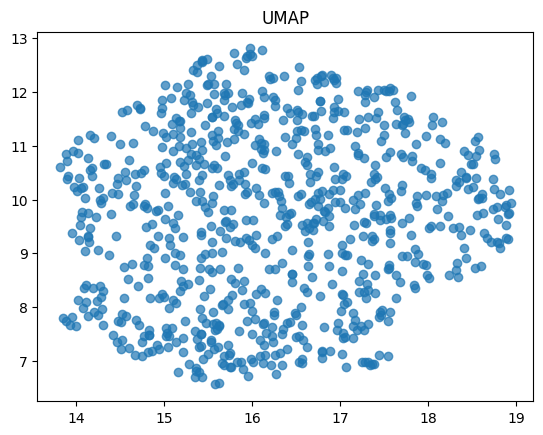

In [11]:
# 6. UMAP (Interactive Visualization)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7)
plt.title("UMAP")
plt.show()

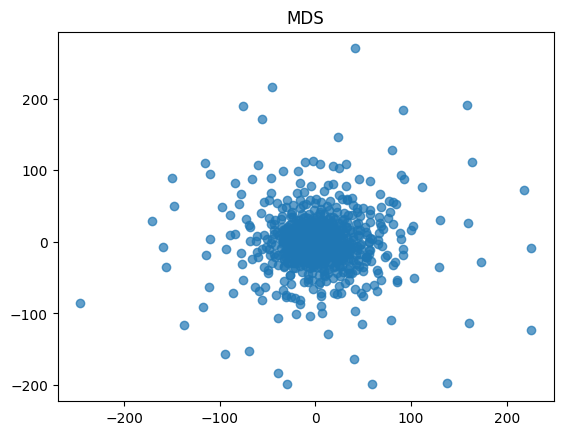

In [12]:
# 7. MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7)
plt.title("MDS")
plt.show()

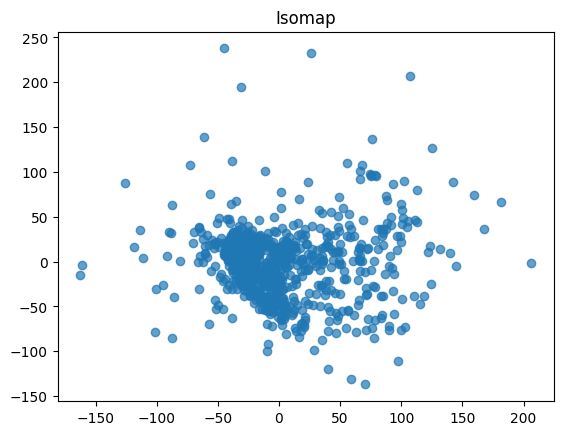

In [13]:
# 8. ISOMAP
isomap = Isomap(n_neighbors=5, n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], alpha=0.7)
plt.title("Isomap")
plt.show()

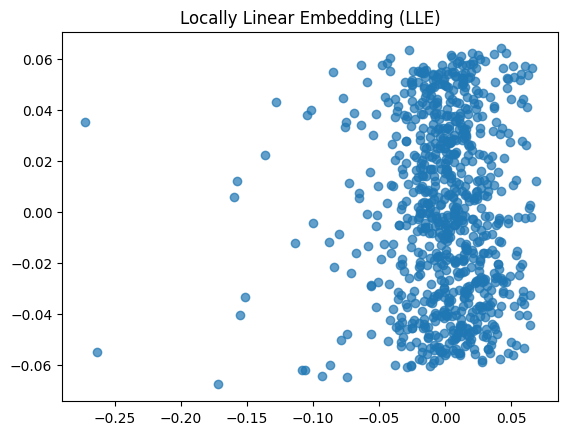

In [14]:
# 9. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method="standard")
X_lle = lle.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.7)
plt.title("Locally Linear Embedding (LLE)")
plt.show()

Epoch 1/50
26/26 [==============================] - 2s 29ms/step - loss: 1.0282
Epoch 2/50
26/26 [==============================] - 1s 24ms/step - loss: 0.9057
Epoch 3/50
26/26 [==============================] - 1s 21ms/step - loss: 0.8948
Epoch 4/50
26/26 [==============================] - 1s 27ms/step - loss: 0.8903
Epoch 5/50
26/26 [==============================] - 1s 24ms/step - loss: 0.8875
Epoch 6/50
26/26 [==============================] - 1s 21ms/step - loss: 0.8853
Epoch 7/50
26/26 [==============================] - 1s 21ms/step - loss: 0.8824
Epoch 8/50
26/26 [==============================] - 1s 21ms/step - loss: 0.8780
Epoch 9/50
26/26 [==============================] - 1s 23ms/step - loss: 0.8739
Epoch 10/50
26/26 [==============================] - 1s 23ms/step - loss: 0.8699
Epoch 11/50
26/26 [==============================] - 1s 20ms/step - loss: 0.8683
Epoch 12/50
26/26 [==============================] - 1s 23ms/step - loss: 0.8651
Epoch 13/50
26/26 [==================

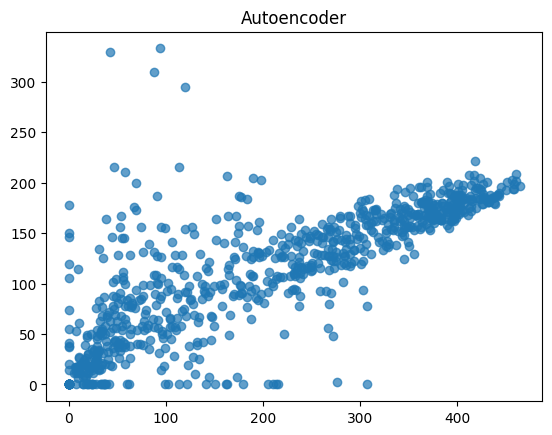

In [15]:
# 10. Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2  # 2D for visualization

# Autoencoder Model
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
encoder_output = Dense(encoding_dim, activation="relu")(encoder)

decoder = Dense(64, activation="relu")(encoder_output)
decoder = Dense(128, activation="relu")(decoder)
decoder_output = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(input_layer, decoder_output)
encoder_model = Model(input_layer, encoder_output)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=1)

# Encode the data
X_autoencoded = encoder_model.predict(X_scaled)

# Plot Autoencoder
plt.figure()
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], alpha=0.7)
plt.title("Autoencoder")
plt.show()
